In [ ]:
# Python Program for PCA Plot.

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  855  773  752  817  788  198  186  186  188  167
gene2  187  171  150  178  160  435  420  424  410  439
gene3  846  866  894  819  818  890  895  914  839  869
gene4   54   57   52   43   58  968  876  943  905  902
gene5  371  379  384  417  384  410  433  413  463  431
data.shape: (100, 10)



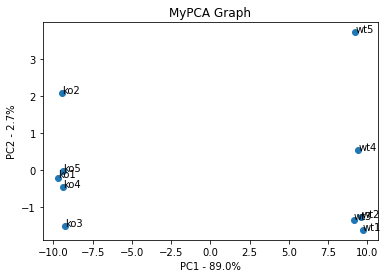

loading_scores[top_10_genes]
gene100    0.105950
gene89     0.105919
gene40    -0.105917
gene7     -0.105901
gene10     0.105897
gene51    -0.105895
gene14    -0.105885
gene57     0.105876
gene50    -0.105861
gene52    -0.105855
dtype: float64


In [1]:
# Python is a general purpose programming language.
# Python does not support table of data, random number generation 
# or graph like R.
# we have to import the packages.

# import pandas package. Pandas is short hand for "panel data"
import pandas as pd
import numpy as np   # for math and random number
import random as rd  # Generate example dataset
# sklearn for PCA
from sklearn.decomposition import PCA
# Preprocessing packages: Scaling data
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Generate the dataset for array of 100 gene names.
# "gene1", "gene2", etc. from 1 to 100.
genes = ['gene' + str(i) for i in range(1, 101)]
# We have 5 wt (wild type) and 5 ko (knock out) samples
# range (1, 6) = 1, ..., 5
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str (i) for i in range(1, 6)]
# Create Panda "DataFrame" to store the made up data.
# The * (stars) unpack the wt and ko array
# so that the column  anme are single array:
# [wt1, wt2, ..., wt5, ko1, ko2, ..., ko5]
data = pd.DataFrame (columns = [*wt, *ko], index=genes)

for gene in data.index:
    # Create the the random data.
    # row: gene1, gene2, ..., gen100, 
    # columns: wt1, wt2, ..., wt5, ko1, ko2, ..., ko5
    # Use poisson function to pick up one number from [random number= 10, 9999]
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
    # umpy.random.poisson(lam=1.0, size=None)¶
    # https://www.geeksforgeeks.org/randrange-in-python/
    # random.randrange(start(opt),stop,step(opt))
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson (lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson (lam=rd.randrange(10,1000), size=5)

print(data.head())
#        wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
# gene1  869  900  937  870  806  588  670  632  643  591
# gene2  334  302  334  348  342   48   55   55   59   52
# gene3  399  412  403  355  419  334  316  307  320  318
# gene4  940  942  929  968  973  677  709  631  625  677
# gene5  295  268  290  289  309  725  784  756  723  735
print('data.shape:', data.shape)
print()
# data.shape: (100, 10)

# Before PCA, we center and scale the data
# After centering, the average value for each gene will be 0. 
# After the scaling, the standard deviation for the values for 
# each gene will be 1.
# Note 1:
# We are passing the transpose of the data.
# The scale function expect eh samples to be rows instead of columns.
# Note 2: 
# We sue samples as columns in this example because that is
# how genomic data is store.
# There is no requirement thar samples have to store in row or columns.
# In this case, we have to transpose the columns into rows
# for python PCA to analyze.
# Note 3:
# sklearn center and scale the data. 
# The mean for each gene are 0 and the standard deviation for each gene are 1. 
#   Second method: StandardScaler().fit_transofrm(data.T)
# The second method is more commonly to use.
# Note 4:
# Scaling with sklearn vs. scale() or prcomp() in R.
# In Sklearn: variation is calculated as follow:
# (measurement - mean)^2 / (the number of measurements)
# Note 5:
# In scale() or prcomp() of R, variation is calculated as:
# (measurement -mean)^2 / [the number of measurement - 1]
# The result has no effect of PCA analysis, the loading Scores, 
# and amount of variation percentage.
# They have some side effect in the final graph. 
# Coodrinate on the final graph come from the multiplying 
# the loading scores by the scaled value.
scaled_data = preprocessing.scale(data.T)

# Now, we create a PCA object. Sklearn use objects can be trained by 
# one dataset and then applied to other dataset. 
pca = PCA()

# perform the PCA principal components account for.
pca.fit(scaled_data)
# Generate coordinate for a PCA graph based on the loading scores 
# and scaled data.
# https://stats.stackexchange.com/questions/409176/what-does-the-pca-transform-method-do
pca_data = pca.transform(scaled_data)

# Calculate the percentage of variation that each principal accounts for.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1) 
# Create lables for the Scree Plot
# These are "PC1", "PC2", and etc. (one label per principal component)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# Now plot the graph by matplotlib.
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title ('Scree Plot')
plt.show()

# We can see almost variation is along PC1 (and some PC2).
# PC1 and PC2 should be good representation of original data.

# Now, we plot the PCA.
# To draw a PCA plot, we need to have new coordinates, created by 
# pca.transform(scaled.data).
# We need DataFrame() for matrix foramt where rows have sample labels
# and columns have PC labels.
# *wt and *ko spread the wt array into the separate elements
pca_df = pd.DataFrame (pca_data, index=[*wt, *ko], columns=labels)

# Plot the graph
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('MyPCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# add sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

# Lastly, let's look at the loading scores for PC1 to determine
# which genes had the largest influence on separating the two clusters 
# along the x-axis.
# we create Pandas "Series" object with Loading scores in PC1.
# Note:
# The PCs are zero-indexed. PC1 index = 0 => pca.components_[0]
loading_scores = pd.Series (pca.components_[0], index=genes)
# we sort the loading scores based on their magnitude (absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
# Gene names
top_10_genes = sorted_loading_scores[0:10].index.values

# Lastly, we print out the top 10 gene names and their corresponding
# loading scores.
print('loading_scores[top_10_genes]')
print(loading_scores[top_10_genes])
# loading_scores[top_10_genes]
# gene73    0.106155
# gene34   -0.106134
# gene19    0.106133
# gene52    0.106123
# gene82    0.106120
# gene12    0.106104
# gene70   -0.106094
# gene32   -0.106092
# gene11    0.106069
# gene85    0.106066
# dtype: float64